In [23]:
from pyopenms import*
sequence=AASequence.fromString("DFPIANGER")
print(sequence)
sequence_prefix=sequence.getPrefix(3)
print(sequence_prefix)
sequence_suffix=sequence.getSuffix(3)
print(sequence_suffix)
sequence2=AASequence.fromString("DFGNOHCGK")
print(sequence2)
concatenate=sequence+sequence2
print(concatenate)
mass_full_peptide=sequence.getMonoWeight()
print(mass_full_peptide)
mprecursor = sequence.getMonoWeight(Residue.ResidueType.Full, 2)
print(mprecursor)
mz=sequence.getMonoWeight(Residue.ResidueType.Full,2)/2
print(mz)


DFPIANGER
DFP
GER
DFGNOHCGK
DFPIANGERDFGNOHCGK
1017.4879641373001
1019.5025170708421
509.7512585354211


In [19]:
sequence=AASequence.fromString("DFPIANGER")
for Amino_Acid in sequence:
    print(Amino_Acid.getName(),":",Amino_Acid.getMonoWeight())


Aspartate :: 133.0375092233
Phenylalanine :: 165.0789793509
Proline :: 115.06332928709999
Isoleucine :: 131.0946294147
Alanine :: 89.0476792233
Asparagine :: 132.0534932552
Glycine :: 75.0320291595
Glutamate :: 147.0531592871
Arginine :: 174.1116764466


In [48]:
sequence=AASequence.fromString("DFPIANGER")
sequence_formula=sequence.getFormula()
print("the peptide formula is  ",sequence_formula)
coarse_isotopes =sequence_formula.getIsotopeDistribution( CoarseIsotopePatternGenerator(6) )
for isotop in coarse_isotopes.getContainer():
    print ("Isotop", isotop.getMZ(), "has abundance", isotop.getIntensity()*100, "%")
print("#"*40)    
fine_isotopes = sequence_formula.getIsotopeDistribution( FineIsotopePatternGenerator(0.01) ) 
for isotop in fine_isotopes.getContainer():
    print("Isotop",isotop.getMZ(),"has abundance", isotop.getIntensity()*100, "%")

the peptide formula is   C44H67N13O15
Isotop 1017.4879641373001 has abundance 56.8165123462677 %
Isotop 1018.4913189751001 has abundance 30.52913248538971 %
Isotop 1019.4946738129 has abundance 9.802105277776718 %
Isotop 1020.4980286507001 has abundance 2.3292062804102898 %
Isotop 1021.5013834885001 has abundance 0.4492596257477999 %
Isotop 1022.5047383263001 has abundance 0.07378292502835393 %
########################################
Isotop 1017.4879641373001 has abundance 56.80969953536987 %
Isotop 1018.4849991373001 has abundance 2.7278145775198936 %
Isotop 1018.4913191373001 has abundance 27.035287022590637 %
Isotop 1018.4921811373001 has abundance 0.3246041014790535 %
Isotop 1018.4942408854 has abundance 0.4377691075205803 %
Isotop 1019.4883541373001 has abundance 1.2981452979147434 %
Isotop 1019.4922181373001 has abundance 1.7511537298560143 %
Isotop 1019.4946741373 has abundance 6.286735832691193 %
Isotop 1019.4975958854001 has abundance 0.2083308296278119 %
Isotop 1020.49170913

In [49]:
sequence=AASequence.fromString("DFPIANGER")
suffix = sequence.getSuffix(3)
y3_formula = suffix.getFormula(Residue.ResidueType.YIon, 2)
print("y3 molecular formula:", y3_formula)
print("y3 mz:", suffix.getMonoWeight(Residue.ResidueType.YIon, 2) / 2.0 )

y3 molecular formula: C13H24N6O6
y3 mz: 181.09514384957103


In [53]:
b= FASTAEntry()
b.sequence = "MKWVTFISLLLLFSSAYSRGVFRRDTHKSEIAHRFKDLGE"
b.description = "BSA Bovine Albumin (partial sequence)"
b.identifier = "BSA"
a= FASTAEntry()
a.sequence = "MKWVTFISLLFLFSSAYSRGVFRRDAHKSEVAHRFKDLGE"
a.description = "ALB Human Albumin (partial sequence)"
a.identifier = "ALB"
entries = [b, a]
f = FASTAFile()
f.store("exp.fasta", entries)
entries = []
f = FASTAFile()
f.load("exp.fasta", entries)
print( len(entries) )
for e in entries:
    print (e.identifier, e.sequence)
   

2
BSA MKWVTFISLLLLFSSAYSRGVFRRDTHKSEIAHRFKDLGE
ALB MKWVTFISLLFLFSSAYSRGVFRRDAHKSEVAHRFKDLGE


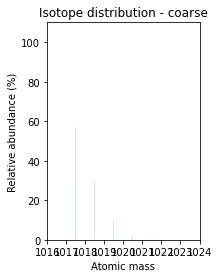

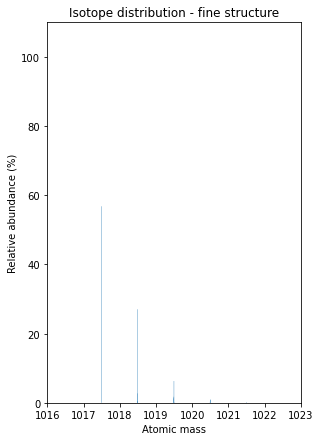

<Figure size 720x504 with 0 Axes>

In [24]:
 import math
 from matplotlib import pyplot as plt
 sequence=AASequence.fromString("DFPIANGER")
 sequence_formula=sequence.getFormula()
 coarse_isotopes =sequence_formula.getIsotopeDistribution( CoarseIsotopePatternGenerator(6) )
 fine_isotopes = sequence_formula.getIsotopeDistribution( FineIsotopePatternGenerator(0.01) ) 
 def plotIsotopeDistribution(isotope_distribution, title="Isotope distribution"):
     plt.title(title)
     distribution = {"mass": [], "abundance": []}
     for iso in isotope_distribution.getContainer():
         distribution["mass"].append(iso.getMZ())
         distribution["abundance"].append(iso.getIntensity() * 100)
     bars = plt.bar(distribution["mass"], distribution["abundance"], width=0.01, snap=False) 
     plt.ylim([0, 110])   
     plt.xticks(range(math.ceil(distribution["mass"][0]) - 2,math.ceil(distribution["mass"][-1]) + 2))
     plt.xlabel("Atomic mass")
     plt.ylabel("Relative abundance (%)")
     plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plotIsotopeDistribution(coarse_isotopes, "Isotope distribution - coarse")
plt.subplot(1,2,2)
plotIsotopeDistribution(fine_isotopes, "Isotope distribution - fine structure")
plt.show()

In [26]:
seq = AASequence.fromString("PEPTIDESEKUEM(Oxidation)CER")
print(seq.toUnmodifiedString())
print(seq.toString())
print(seq.toUniModString())
print(seq.toBracketString())
print(seq.toBracketString(False)) 
print(AASequence.fromString("DFPIAM(UniMod:35)GER"))
print(AASequence.fromString("DFPIAM[+16]GER"))
print(AASequence.fromString("DFPIAM[+15.99]GER"))
print(AASequence.fromString("DFPIAM[147]GER"))
print(AASequence.fromString("DFPIAM[147.035405]GER"))

PEPTIDESEKUEMCER
PEPTIDESEKUEM(Oxidation)CER
PEPTIDESEKUEM(UniMod:35)CER
PEPTIDESEKUEM[147]CER
PEPTIDESEKUEM[147.03540001709996]CER
DFPIAM(Oxidation)GER
DFPIAM(Oxidation)GER
DFPIAM(Oxidation)GER
DFPIAM(Oxidation)GER
DFPIAM(Oxidation)GER
